# Navigating Short Stories

In this notebook, we explain how to do DEFT (DAG extraction from text)
using as a test case, the following 3 stories by P.G. Wodehouse.

* [Bill the Bloodhound](../short_stories/bill-the-bloodhound.txt)
* [Extricating Young Gussie](../short_stories/extricating-young-gussie.txt)
* [Wilton's Holiiday](../short_stories/wiltons-holiday.txt)


In [1]:
# this makes sure it starts looking for things from the project folder down.
import os
import sys
os.chdir('../')
sys.path.insert(0,os.getcwd())
print(os.getcwd())

C:\Users\rrtuc\Desktop\backed-up\python-projects\mappa_mundi


In [13]:
from utils import *
print_welcome_message()

Welcome Causal AI Navigator. We have been waiting for you for millenia. Where would you like us to go next?


## Global variables
All the global variables used by Mappa Mundi are  in this file.
Change with caution.


[my_globals.py](../my_globals.py)

## Originals

Here is the original form of the 3 stories, in the form they were downloaded
from the Project Gutenberg website.

* [Bill the Bloodhound](../short_stories/bill-the-bloodhound.txt)
* [Extricating Young Gussie](../short_stories/extricating-young-gussie.txt)
* [Wilton's Holiiday](../short_stories/wiltons-holiday.txt)

## Cleaning

The results of this step can be found in the **short_stories_clean** 
directory.

* [Bill the Bloodhound (clean)](../short_stories_clean/bill-the-bloodhound.txt)
* [Extricating Young Gussie (clean)](../short_stories_clean/extricating-young-gussie.txt)
* [Wilton's Holiiday (clean)](../short_stories_clean/wiltons-holiday.txt)

In [3]:
from cleaning_m_scripts import *

in_dir = "short_stories"
out_dir = "short_stories_clean"
batch_file_names = os.listdir(in_dir)[0:3]
clean_batch_of_m_scripts(
    in_dir, out_dir,
    batch_file_names,
    remove_dialog=False)

1.
fetching bill-the-bloodhound.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []
2.
fetching extricating-young-gussie.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []
3.
fetching wiltons-holiday.txt
indent prob dist = [(0, 1.0)]
dialog indents= [0]
narration indents= []


## Spell-checking

The results of this step can be found in the **short_stories_spell** directory

* [Bill the Bloodhound (spell)](../short_stories_spell/bill-the-bloodhound.txt)
* [Extricating Young Gussie (spell)](../short_stories_spell/extricating-young-gussie.txt)
* [Wilton's Holiiday (spell)](../short_stories_spell/wiltons-holiday.txt)

In [4]:
from spell_checking import *
use_local_dict=True
error_type = "all"

print("use_local_dict=", use_local_dict)
print("error_type=", error_type)
print("SPELLING_CORRECTION_RISK=", SPELLING_CORRECTION_RISK)
print()

in_dir = "short_stories_clean"
out_dir = "short_stories_spell"
batch_file_names = os.listdir(in_dir)
correct_this_batch_of_files(in_dir,
                            out_dir,
                            batch_file_names,
                            error_type= error_type,
                            verbose=False,
                            use_local_dict=use_local_dict)

use_local_dict= True
error_type= all
SPELLING_CORRECTION_RISK= 1e-08

1.
bill-the-bloodhound.txt
all changes: [('inscrutably', 'inscrutable')]
2.
extricating-young-gussie.txt
all changes: [('kep', 'keep'), ('deepo', 'deep')]
3.
wiltons-holiday.txt
all changes: []


## Simplifying

The results of this step can be found in the **short_stories_simp** directory

* [Bill the Bloodhound (simp)](../short_stories_simp/bill-the-bloodhound.txt)
* [Extricating Young Gussie (simp)](../short_stories_simp/extricating-young-gussie.txt)
* [Wilton's Holiiday (simp)](../short_stories_simp/wiltons-holiday.txt)


In [5]:
from simplifying import *

in_dir = "short_stories_spell"
out_dir = "short_stories_simp"
batch_file_names = os.listdir(in_dir)[0:3]
simplify_batch_of_m_scripts(
    in_dir, out_dir,
    batch_file_names,
    verbose=False)

1. bill-the-bloodhound.txt
2. extricating-young-gussie.txt
3. wiltons-holiday.txt


## DAG Atlas creation


The results of this step found in the **short_stories_dag_atlas** directory. They are 3 pickled 
files, one for each of the 3 short stories. They will be opened in the next step.

In [ ]:
from DagAtlas import *

simp_dir = "short_stories_simp"
dag_dir = "short_stories_dag_atlas"
atlas = DagAtlas(simp_dir, dag_dir)
all_titles = [file_name[:-len(".txt")] \
              for file_name in os.listdir(simp_dir)]
atlas.update_arrows_in_batch_of_m_scripts(
    batch_titles=all_titles[0:3])

## Visualizing

In this step, we a draw DAG for each of the 3 short stories, based on the
pickled files in the **short_stories_dag_atlas** directory.
We do this for 2 arrow repetition thresholds: 3, 4.

In [10]:
from Dag import *

def visualize_all_dags(reps_threshold, draw):

    dag_dir = "short_stories_dag_atlas"
    simp_dir = "short_stories_simp"
    clean_dir = "short_stories_clean"
    file_names = [file_name for
                  file_name in os.listdir(dag_dir)[0:3]]
    dags = []
    for fname in file_names:
        path = dag_dir + "/" + fname
        with open(path, "rb") as f:
            dag = pik.load(f)
            dags.append(dag)
    for dag in dags:
        print("-------------------------")
        print(dag.m_title)
        hreps_arrows = dag.build_high_reps_arrows(
            reps_threshold)
        print({arrow_str(arrow):dag.arrow_to_reps[arrow] \
               for arrow in hreps_arrows})
        print()
        if draw:
            dag.draw(reps_threshold, jupyter=True)
            dag.print_map_legend(clean_dir, simp_dir, reps_threshold)

-------------------------
bill-the-bloodhound
{'(95,0)->(166,1)': 5}



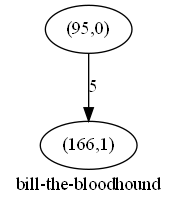

MAP LEGEND
title: bill-the-bloodhound
arrow repetitions threshold: 4
number of arrows shown: 1
number of arrows dropped: 36
(95,0):
(FULL) In the second place, to have to do his creeping about and spying practically in her presence--
(PART) place creeping
(166,1):
(FULL) Later, maybe, it was a courteous old retired colonel who stopped you and inquired the way to Trafalgar Square.
(PART) inquired way
-------------------------
extricating-young-gussie
{'(86,1)->(272,0)': 4, '(86,1)->(275,0)': 4, '(272,0)->(275,0)': 6}



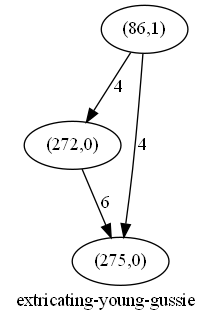

MAP LEGEND
title: extricating-young-gussie
arrow repetitions threshold: 4
number of arrows shown: 3
number of arrows dropped: 103
(86,1):
(FULL) What is bred in the bone will come out in the wash, and all that kind of thing, you know.'
(PART) kind thing know
(272,0):
(FULL) At first poor old Gussie asked him to stop, but the chappie said, No, it was always done.
(PART) chappie said
(275,0):
(FULL) And the chappie said to Gussie, 'There you are!'
(PART) chappie said
-------------------------
wiltons-holiday
{'(234,0)->(334,0)': 6, '(50,0)->(113,0)': 4}



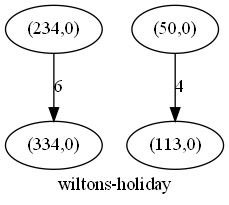

MAP LEGEND
title: wiltons-holiday
arrow repetitions threshold: 4
number of arrows shown: 2
number of arrows dropped: 50
(50,0):
(FULL) Some men said that she had fine eyes.
(PART) men said
(113,0):
(FULL) 'They do not marry girls like Mary.'
(PART) marry girls
(234,0):
(FULL) It was not fair, he felt, that she should jockey at the start in this way and keep him hanging about here catching cold.
(PART) jockey start way
(334,0):
(FULL) 'There is a jelly-fish just where you are going to sit,' said Wilton.
(PART) jelly fish going sit said


In [11]:
visualize_all_dags(reps_threshold=4, draw=True)

-------------------------
bill-the-bloodhound
{'(77,0)->(95,0)': 3, '(77,0)->(166,1)': 3, '(95,0)->(140,0)': 3, '(95,0)->(154,0)': 3, '(95,0)->(166,1)': 5, '(95,0)->(182,0)': 3, '(95,0)->(291,0)': 3, '(95,0)->(414,1)': 3}



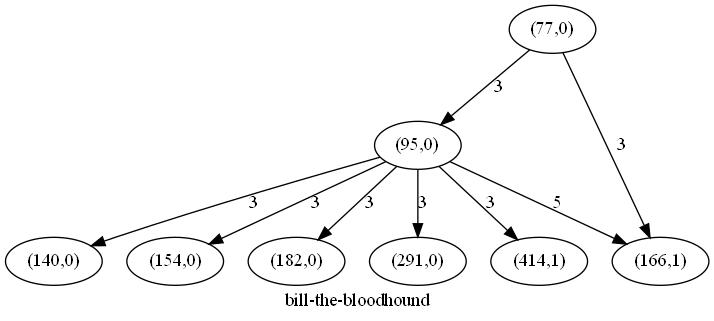

MAP LEGEND
title: bill-the-bloodhound
arrow repetitions threshold: 3
number of arrows shown: 8
number of arrows dropped: 29
(77,0):
(FULL) The boss wants you.
(PART) boss wants
(95,0):
(FULL) In the second place, to have to do his creeping about and spying practically in her presence--
(PART) place creeping
(140,0):
(FULL) He lit his cigar.
(PART) lit cigar
(154,0):
(FULL) That is what we have all been wondering all this time.'
(PART) wondering time
(166,1):
(FULL) Later, maybe, it was a courteous old retired colonel who stopped you and inquired the way to Trafalgar Square.
(PART) inquired way
(182,0):
(FULL) He must have overdone some of the lines on his forehead.
(PART) overdone lines forehead
(291,0):
(FULL) All these things might have been forgiven her, but she supplemented them by the crime known in stage circles as 'throwing her weight about'.
(PART) things forgiven
(414,1):
(FULL) I drew Crane in the sweep, and I would have taken twopence for my chance of winning it.'
(PART) tak

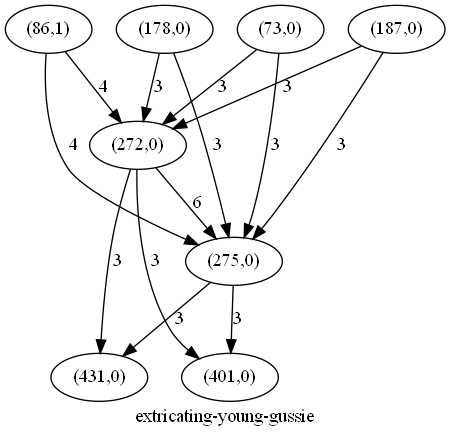

MAP LEGEND
title: extricating-young-gussie
arrow repetitions threshold: 3
number of arrows shown: 13
number of arrows dropped: 93
(73,0):
(FULL) He had some excellent letters of introduction, and when he wrote home to say that he had met the most charming and beautiful girl in the world I felt quite happy.
(PART) wrote home
(86,1):
(FULL) What is bred in the bone will come out in the wash, and all that kind of thing, you know.'
(PART) kind thing know
(178,0):
(FULL) Bertie, I have fallen in love with the dearest girl in the world.'
(PART) fallen love dearest girl world
(187,0):
(FULL) I will tell you the whole thing.'
(PART) tell thing
(272,0):
(FULL) At first poor old Gussie asked him to stop, but the chappie said, No, it was always done.
(PART) chappie said
(275,0):
(FULL) And the chappie said to Gussie, 'There you are!'
(PART) chappie said
(401,0):
(FULL) 'Gussie went into the business,' I said, 'because the girl's father would not let him marry her unless he did.
(PART) went busine

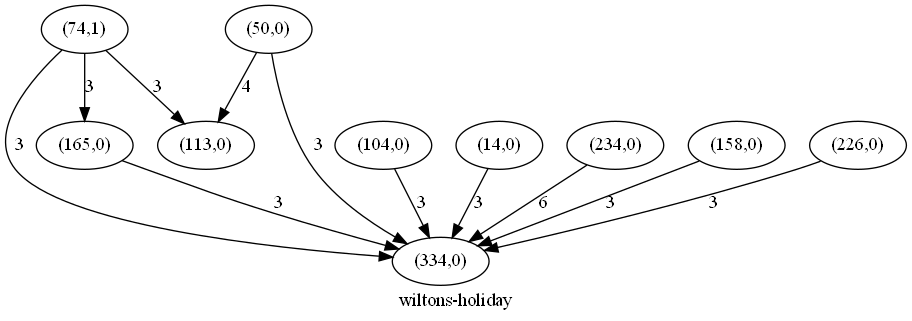

MAP LEGEND
title: wiltons-holiday
arrow repetitions threshold: 3
number of arrows shown: 11
number of arrows dropped: 41
(14,0):
(FULL) It is a thing he does not like to have known.
(PART) thing like known
(50,0):
(FULL) Some men said that she had fine eyes.
(PART) men said
(74,1):
(FULL) The only reason why anyone comes away from a summer at Marois Bay unbetrothed is because there are so many girls that he falls in love with that his holiday is up before he can, so to speak, concentrate.
(PART) girls falls love
(104,0):
(FULL) But then, I am nothing to write home about, whereas the smallest gleam of intelligence should have told Wilton that he was a kind of Ouida guardsman.
(PART) write home
(113,0):
(FULL) 'They do not marry girls like Mary.'
(PART) marry girls
(158,0):
(FULL) I cannot possibly tell her the whole thing was a fraud.
(PART) possibly tell thing fraud
(165,0):
(FULL) 'Make it a whole mind,' I said, 'and you win out.'
(PART) mind said
(226,0):
(FULL) 'I must go round the 

In [12]:
visualize_all_dags(reps_threshold=3, draw=True)